# <img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web scraping for Goodreads website



Created by: Muneera Alhajri

## context

The reason for creating this dataset is the requirement of a good clean dataset of computer books. I had searched for datasets on books in Kaggle and I found out that while most of the datasets had a good amount of books listed, there were either major columns missing or grossly unclean data. I mean, you can't determine how good a book is just from a few text reviews. So I collected this data from the Goodreads website from the "Computer" category to help people who are li like this type of book.

### Link to the Goodreads kernel in Kaggle:

https://www.kaggle.com/muneeralhajri/goodreadscomputerbooks

## Step1 1: Start to download Good reads(Books of computer category) html page 

In [3]:
import requests
import re
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from time import sleep
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from webdriver_manager.chrome import ChromeDriverManager
import seaborn as sns


In [477]:
# Step 1 : Download Html page 
driver = webdriver.Chrome(ChromeDriverManager().install())
# request url
driver.get('https://www.goodreads.com/search?page=1&q=computer&qid=nxNcEaU1tj&tab=books')
sleep(5) # Delay execution for a given number of seconds to allow the page to be loaded.
html = driver.page_source

[WDM] - Current google-chrome version is 88.0.4324
[WDM] - Get LATEST driver version for 88.0.4324


[WDM] - Driver [/Users/muneeraalhajri/.wdm/drivers/chromedriver/mac64/88.0.4324.96/chromedriver] found in cache


## step 2 :Start scraping the website by using beautifulsoup

In [478]:
items= soup1.find_all('tr', attrs={'itemtype':'http://schema.org/Book'})

In [379]:
#Define the book details lists
book_name=[]
authors=[]
ratings_count=[]
Avgrating=[]
published=[]
edition=[]
pages=[]
Language=[]
reviews=[]

In [445]:
#This function will use a loop to collect all books information in a page
def fun():
    for i in range(0,len(items)):
        
#Book Name
        try:
            title=items[i].find('a',attrs={'class':'bookTitle'}).text
            title=(re.sub(r'[\n]','',title))
            book_name.append(title)
        
        except:
            book_name.append("none")
            
#Authors names
        try:
            author_name=items[i].find('div',attrs={'class':'authorName__container'}).text
            authors.append((re.sub(r'[\n]','',author_name)))
        except:
            authors.append("none")
            
# Rating count
        try:
            ratings=items[i].find('span',attrs={'class':'minirating'}).text
            ratings_count.append(ratings.split()[-2])
        except:
            ratings_count.append("-")  
            
            
# Average rating 
        try:
            rating=items[i].find('span',attrs={'class':'minirating'}).text
            Avgrating.append(rating[0:6])
        except:
            Avgrating.append("-") 
            
#Published 
        try:
            publish=items[i].find('span',attrs={'class':'greyText smallText uitext'}).text
            publish=((re.sub(r'[\n ]','',publish)))
            published.append(re.search(r'(\d{4})',publish).group(1))
        except:
            published.append("-") 
            
#Published 
        try:
            edition_no=items[i].find('a',attrs={'class':'greyText'}).text
            edition.append(re.search(r'(\d+)',edition_no[0:3]).group(1))
        except:
            edition.append("-") 
        
#--------------------------------------------------------------------------------------

# click and open Book page
        driver.find_element_by_link_text(title).click()
        sleep(5)
        html = driver.page_source # now this has new page
        soup2 = BeautifulSoup(html, 'html.parser')
        item2=soup2.find('div', attrs={'class':'last col stacked'})
        
#Number of pages
        try:
            page_no=item2.find('span',attrs={'itemprop':'numberOfPages'}).text
            pages.append(re.search(r'(\d+)',page_no).group(1))
        except:
            pages.append("-") 
#Book language

        try:
            book_language=item2.find('div',attrs={'itemprop':'inLanguage'}).text
            if book_language== "":
                Language.append("-")
            else:
                Language.append(book_language)
        except:
            Language.append("-") 
            
#Book reviews

        try:
            book_reviews=item2.find('meta',attrs={'itemprop':'reviewCount'})
            reviews.append(book_reviews["content"])
        except:
            reviews.append("-") 
        
        driver.back()


In [ ]:
#This loop will visit each page and save the current url then call fun Function 
for i in range(1,21):
        sleep(5) # Delay execution for a given number of seconds to allow the page to be loaded.
        html = driver.page_source
        soup1 = BeautifulSoup(html, 'html')
        items= soup1.find_all('tr', attrs={'itemtype':'http://schema.org/Book'})
        fun()
        driver.find_element_by_link_text("next »").click()

### Save the collected data in the CSV file

In [ ]:
df=pd.DataFrame({'book_Title':book_name,'Author_Name':authors,'ratings_count':ratings_count,'Avg_Rating':Avgrating,'Publish_year':published,'Edition':edition,'Pages_no':pages,'Book_language':Language,'Reviews':reviews})

In [497]:
#Add name for the index column
df.index.name='Book_Id'

In [500]:
df.to_csv('Book_Dataset.csv')

### Import data

In [4]:
data= pd.read_csv('./Book_Dataset.csv')

### Datasets Description

[Data Source] ([https://www.goodreads.com/book])
The source of this data from good reads website

**Data Dictionary**

| Variable |	Description  |
|----------|-----------------|
| Book title |The title of the book|
| Author name  | name of who write the book|
| ratings count  | how many rating the book got|
| average ratings  |the average of the rating|
| published year  |the year when the book published|
| edition  | the latest number of edition|
| pages number  |	how many pages the book contain|
| book language  |language of the book|
| number of reviews  |how many people review the book|


### Data Cleaning and EDA

In [595]:
data.head()

,Book_Id,book_Title,Author_Name,ratings_count,Avg_Rating,Publish_year,Edition,Pages_no,Book_language,Reviews
0,0,Algorithms to Live By: The Computer Science of...,Brian Christian,20493.0,4.14,2016,46,368,English,1962
1,1,iWoz: Computer Geek to Cult Icon: How I Invent...,Steve Wozniak,16529.0,3.81,2006,37,313,English,794
2,2,Code: The Hidden Language of Computer Hardware...,Charles Petzold,7052.0,4.40,1999,21,400,English,575
3,3,The Cuckoo's Egg: Tracking a Spy Through the M...,Clifford Stoll,10386.0,4.24,1989,28,399,English,839
4,4,Hackers: Heroes of the Computer Revolution,Steven Levy,7207.0,4.14,1984,4,464,English,416


In [594]:
data.shape

(1234, 10)

In [590]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Book_Id        1234 non-null   int64  
 1   book_Title     1234 non-null   object 
 2   Author_Name    1234 non-null   object 
 3   ratings_count  1234 non-null   float64
 4   Avg_Rating     1234 non-null   float64
 5   Publish_year   1234 non-null   int64  
 6   Edition        1234 non-null   int64  
 7   Pages_no       1234 non-null   int64  
 8   Book_language  1234 non-null   object 
 9   Reviews        1234 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 96.5+ KB


#### Filling missing values

In [584]:
#No missing values in this data
data.isna().sum()


Book_Id          0
book_Title       0
Author_Name      0
ratings_count    0
Avg_Rating       0
Publish_year     0
Edition          0
Pages_no         0
Book_language    0
Reviews          0
dtype: int64

#### Check for column values

In [ ]:
#In language column there are 4 languages

In [591]:
data.Book_language.value_counts()

English    1225
Italian       5
German        3
Tamil         1
Name: Book_language, dtype: int64

In [592]:
#Author's names
data.Author_Name.value_counts()

Donald Ervin Knuth           18
Gary B. Shelly               13
Sumita Arora                  8
June Jamrich Parsons          7
Wallace Wang                  5
                             ..
Charles Eames                 1
Christopher Finch             1
N. Nissanke                   1
Hesham El  Rewini             1
Jonathan Wolpaw (Editor)      1
Name: Author_Name, Length: 987, dtype: int64

In [596]:
#Number of books in each average rate 
data.Avg_Rating.value_counts()

4.00    74
3.67    30
3.88    26
4.50    23
3.83    19
        ..
2.71     1
1.60     1
4.70     1
4.49     1
4.72     1
Name: Avg_Rating, Length: 186, dtype: int64

### Data Visualization

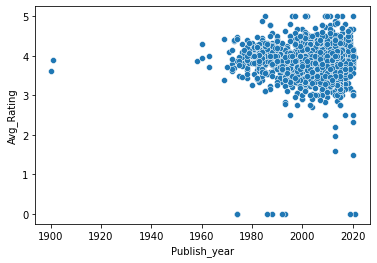

In [599]:
sns.scatterplot(x='Publish_year',y='Avg_Rating',data=data);

the Books which are published in recent year have a high average rate

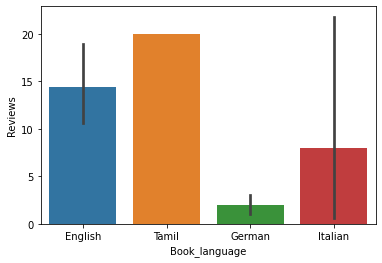

In [602]:
sns.barplot(x='Book_language',y='Reviews',data=data);